<h1><center> PPOL 5203 : Final Project Main Analysis <br><br> 
<font color='grey'> Geospatial Bikeshare in Washington DC <br><br>
Ibadat Jarg and Helen Wang</center></center> <h1> 

In [1]:
#pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [125]:
#Setup
import numpy as np
import pandas as pd
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

In [126]:
#Loading our data
df = pd.read_csv("../data/cleaned_data/final_data.csv")

#seeeing station openned by year
#grouped = df.groupby('Opening Year').size()

# Display the result
#print(grouped)


In [127]:
#Filtering by specified year
df = df[df['opened_2013'] == True]

df

,id,long,lat,open_year,name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,opened_station,opened_2013
3,082544b7-1f3f-11e7-bf6b-3863bb334450,-77.077078,38.943837,2013.0,39th & Veazey St NW,17128.666667,17043.000000,16884.666667,16736.666667,16823.000000,17252.666667,16876.000000,17190.000000,17311.666667,14909.000000,15051.250000,15299.750000,15046.000000,1,True
20,08256e7b-1f3f-11e7-bf6b-3863bb334450,-77.026141,38.887332,2013.0,Independence Ave & L'Enfant Plaza SW/DOE,19707.000000,18692.833333,18804.833333,14210.444444,12654.444444,13117.111111,14776.888889,15654.222222,14928.300000,15726.100000,17577.600000,17666.700000,17793.200000,1,True
21,0825756e-1f3f-11e7-bf6b-3863bb334450,-77.092210,38.983838,2013.0,Montgomery Ave & Waverly St,22365.200000,22126.800000,21932.600000,22067.600000,22666.800000,23600.600000,23488.800000,23461.200000,22585.000000,22596.800000,23179.200000,22974.200000,22560.000000,1,True
34,0825b27e-1f3f-11e7-bf6b-3863bb334450,-77.100239,38.990639,2013.0,Norfolk & Rugby Ave,31662.000000,31520.000000,31521.000000,31712.000000,30030.000000,29791.000000,29852.000000,29010.000000,29761.000000,30332.000000,27690.000000,27441.000000,27442.000000,1,True
50,0825b8f0-1f3f-11e7-bf6b-3863bb334450,-77.050046,38.923583,2013.0,Calvert St & Woodley Pl NW,21692.000000,21584.000000,24337.000000,20007.500000,20111.000000,19929.500000,15320.333333,14888.500000,14009.400000,14377.800000,14514.800000,11927.500000,14577.000000,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0825bce9-1f3f-11e7-bf6b-3863bb334450,-77.109647,38.999634,2013.0,Old Georgetown Rd & Southwick St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True
763,082553a7-1f3f-11e7-bf6b-3863bb334450,-76.995193,38.889988,2013.0,8th & East Capitol St NE,4768.000000,5289.666667,5093.333333,6991.750000,6506.375000,6442.875000,7348.444444,7770.000000,7941.727273,8106.909091,7893.000000,7904.090909,6071.363636,1,True
764,08259804-1f3f-11e7-bf6b-3863bb334450,-77.029350,38.990249,2013.0,East West Hwy & Blair Mill Rd,21132.000000,19970.000000,19971.000000,17294.000000,16077.750000,15950.000000,15988.500000,16162.500000,16595.500000,16925.250000,16120.500000,15999.250000,16004.250000,1,True
769,0825b10b-1f3f-11e7-bf6b-3863bb334450,-77.011210,38.975000,2013.0,Carroll & Westmoreland Ave,10191.000000,9892.000000,9530.000000,10312.500000,10361.500000,10610.500000,10645.000000,9947.000000,9983.333333,10416.333333,10564.666667,10430.333333,10449.333333,1,True


### Data Manipulation



In [128]:
#Adding % change in traffic per station relative to 2013
for year in ['2007', '2008', '2009','2010', '2011', '2012', '2013',  '2014', '2015', '2016','2017', '2018', '2019']:
    df[f'Percent_Change_{year}'] = ((df[year] - df['2013']) / df['2013']) * 100

### Plotting our discontinuity 


In [130]:
#Setup for plotting 
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
percent_changes = df[[f'Percent_Change_{year}' for year in years if year != 2013]].mean(axis=0).values
pre_break = years[:years.index(2013)]
post_break = years[years.index(2013) + 1:]

In [131]:
#Viewing the data
df

,id,long,lat,open_year,name,2007,2008,2009,2010,2011,...,Percent_Change_2010,Percent_Change_2011,Percent_Change_2012,Percent_Change_2013,Percent_Change_2014,Percent_Change_2015,Percent_Change_2016,Percent_Change_2017,Percent_Change_2018,Percent_Change_2019
3,082544b7-1f3f-11e7-bf6b-3863bb334450,-77.077078,38.943837,2013.0,39th & Veazey St NW,17128.666667,17043.000000,16884.666667,16736.666667,16823.000000,...,-0.825630,-0.314055,2.231967,0.0,1.860630,2.581575,-11.655606,-10.812693,-9.340187,-10.843802
20,08256e7b-1f3f-11e7-bf6b-3863bb334450,-77.026141,38.887332,2013.0,Independence Ave & L'Enfant Plaza SW/DOE,19707.000000,18692.833333,18804.833333,14210.444444,12654.444444,...,-3.833313,-14.363270,-11.232255,0.0,5.937199,1.024648,6.423619,18.953321,19.556289,20.412356
21,0825756e-1f3f-11e7-bf6b-3863bb334450,-77.092210,38.983838,2013.0,Montgomery Ave & Waverly St,22365.200000,22126.800000,21932.600000,22067.600000,22666.800000,...,-6.050543,-3.499540,0.475972,0.0,-0.117503,-3.847791,-3.797555,-1.318075,-2.190831,-3.954225
34,0825b27e-1f3f-11e7-bf6b-3863bb334450,-77.100239,38.990639,2013.0,Norfolk & Rugby Ave,31662.000000,31520.000000,31521.000000,31712.000000,30030.000000,...,6.230738,0.596275,-0.204341,0.0,-2.820582,-0.304837,1.607932,-7.242396,-8.076511,-8.073161
50,0825b8f0-1f3f-11e7-bf6b-3863bb334450,-77.050046,38.923583,2013.0,Calvert St & Woodley Pl NW,21692.000000,21584.000000,24337.000000,20007.500000,20111.000000,...,30.594417,31.269990,30.085290,0.0,-2.818694,-8.556820,-6.152172,-5.257936,-22.145950,-4.851940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0825bce9-1f3f-11e7-bf6b-3863bb334450,-77.109647,38.999634,2013.0,Old Georgetown Rd & Southwick St,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,082553a7-1f3f-11e7-bf6b-3863bb334450,-76.995193,38.889988,2013.0,8th & East Capitol St NE,4768.000000,5289.666667,5093.333333,6991.750000,6506.375000,...,-4.854013,-11.459152,-12.323281,0.0,5.736664,8.073584,10.321431,7.410487,7.561416,-17.378927
764,08259804-1f3f-11e7-bf6b-3863bb334450,-77.029350,38.990249,2013.0,East West Hwy & Blair Mill Rd,21132.000000,19970.000000,19971.000000,17294.000000,16077.750000,...,8.165244,0.558214,-0.240798,0.0,1.088282,3.796479,5.858899,0.825593,0.067236,0.098508
769,0825b10b-1f3f-11e7-bf6b-3863bb334450,-77.011210,38.975000,2013.0,Carroll & Westmoreland Ave,10191.000000,9892.000000,9530.000000,10312.500000,10361.500000,...,-3.123532,-2.663222,-0.324096,0.0,-6.557069,-6.215751,-2.148113,-0.754658,-2.016596,-1.838109


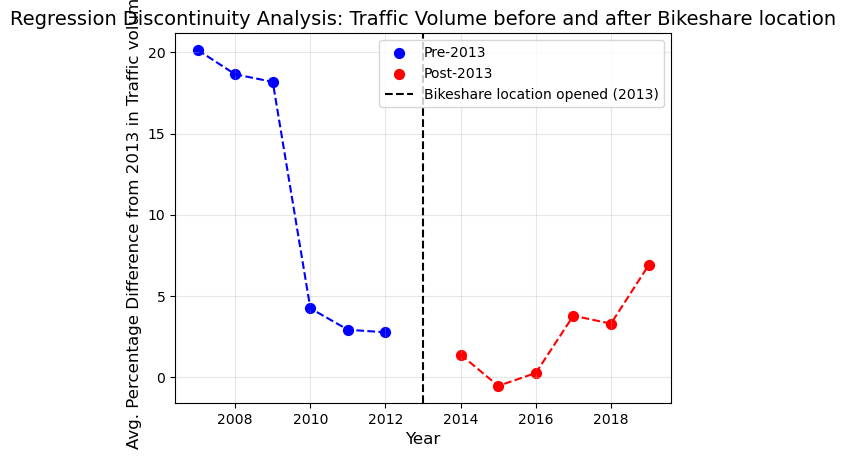

In [132]:
# Pre-breakpoint
plt.scatter(pre_break, percent_changes[:len(pre_break)], color='blue', label='Pre-2013', s=50)
plt.plot(pre_break, percent_changes[:len(pre_break)], color='blue', linestyle='--')

# Post-breakpoint
plt.scatter(post_break, percent_changes[len(pre_break):], color='red', label='Post-2013', s=50)
plt.plot(post_break, percent_changes[len(pre_break):], color='red', linestyle='--')

# Breakpoint
plt.axvline(x=2013, color='black', linestyle='--', label='Bikeshare location opened (2013)')

# Labels and Legend
plt.title('Regression Discontinuity Analysis: Traffic Volume before and after Bikeshare location', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg. Percentage Difference from 2013 in Traffic volume', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

In [133]:
#Revoing outliers 
melted_df_clean = melted_df_clean[melted_df_clean['Percent Change'] <= 50] ###We are removing changes greater %50

# Separate pre- and post-discontinuity data again after cleaning
pre_data = melted_df_clean[melted_df_clean['Year'] <= 2013]
post_data = melted_df_clean[melted_df_clean['Year'] > 2013]

# Fit regression models using sklearn's LinearRegression
pre_model = LinearRegression().fit(pre_data[['Year']], pre_data['Percent Change'])
post_model = LinearRegression().fit(post_data[['Year']], post_data['Percent Change'])

# Generate regression lines using the fitted models
years_pre = np.linspace(pre_data['Year'].min(), pre_data['Year'].max(), 100).reshape(-1, 1)
years_post = np.linspace(post_data['Year'].min(), post_data['Year'].max(), 100).reshape(-1, 1)

reg_line_pre = pre_model.predict(years_pre)
reg_line_post = post_model.predict(years_post)

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for all data points
for id_, group in melted_df_clean.groupby('id'):
    plt.scatter(group['Year'], group['Percent Change'], s=50, alpha=0.7)

# Add regression lines
plt.plot(years_pre, reg_line_pre, color='blue', linestyle='-', label=f'Pre-2013 Regression (Coef: {pre_model.coef_[0]:.2f}, Intercept: {pre_model.intercept_:.2f})')
plt.plot(years_post, reg_line_post, color='red', linestyle='-', label=f'Post-2013 Regression (Coef: {post_model.coef_[0]:.2f}, Intercept: {post_model.intercept_:.2f})')

# Breakpoint at 2013
plt.axvline(x=2013, color='black', linestyle='--', label='Breakpoint (2013)')

# Labels and Title
plt.title('Regression Discontinuity Analysis: Scatter with Regression Lines', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change Relative to 2013 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

NameError: name 'melted_df_clean' is not defined

### Statistical Results 

In [56]:
# Separate pre- and post-discontinuity data again after cleaning
pre_data = melted_df_clean[melted_df_clean['Year'] < 2013]
post_data = melted_df_clean[melted_df_clean['Year'] > 2013]

# Adding constant for intercept using statsmodel 'sm'
pre_X = sm.add_constant(pre_data[['Year']])
post_X = sm.add_constant(post_data[['Year']])

# Fit models using statsmodels OLS using statsmodel 'sm'
pre_model_stats = sm.OLS(pre_data['Percent Change'], pre_X).fit()
post_model_stats = sm.OLS(post_data['Percent Change'], post_X).fit()


In [57]:
# Display the summary of the pre-2013 model
print("Pre-2013 Model Summary:")
print(pre_model_stats.summary())

Pre-2013 Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Percent Change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.09632
Date:                Fri, 06 Dec 2024   Prob (F-statistic):              0.757
Time:                        18:08:30   Log-Likelihood:                -794.16
No. Observations:                 209   AIC:                             1592.
Df Residuals:                     207   BIC:                             1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        578.2381   1853

In [58]:
# Display the summary of the post-2013 model
print("\nPost-2013 Model Summary:")
print(post_model_stats.summary())


Post-2013 Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Percent Change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5169
Date:                Fri, 06 Dec 2024   Prob (F-statistic):              0.473
Time:                        18:08:34   Log-Likelihood:                -785.68
No. Observations:                 207   AIC:                             1575.
Df Residuals:                     205   BIC:                             1582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1331.8318   18

### Panel Data Analysis

In [135]:
#Transformting our data to a usable format for panel data analysis

long_df = pd.melt(
    df, 
    id_vars=['id'],  # Columns to keep (not reshaped)
    value_vars=[str(year) for year in range(2007, 2019)],  # Columns to melt
    var_name='year',  # Name of the new 'year' column
    value_name='traffic_volume'  # Name of the new 'traffic_volume' column
)

# Convert 'year' to integer for consistency
long_df['year'] = long_df['year'].astype(int)

# Add the 'opened' column: 1 if year >= 2013, else 0
long_df['opened'] = (long_df['year'] >= 2013).astype(int)

In [136]:
long_df


,id,year,traffic_volume,opened
0,082544b7-1f3f-11e7-bf6b-3863bb334450,2007,17128.666667,0
1,08256e7b-1f3f-11e7-bf6b-3863bb334450,2007,19707.000000,0
2,0825756e-1f3f-11e7-bf6b-3863bb334450,2007,22365.200000,0
3,0825b27e-1f3f-11e7-bf6b-3863bb334450,2007,31662.000000,0
4,0825b8f0-1f3f-11e7-bf6b-3863bb334450,2007,21692.000000,0
...,...,...,...,...
931,0825bce9-1f3f-11e7-bf6b-3863bb334450,2018,NaN,1
932,082553a7-1f3f-11e7-bf6b-3863bb334450,2018,7904.090909,1
933,08259804-1f3f-11e7-bf6b-3863bb334450,2018,15999.250000,1
934,0825b10b-1f3f-11e7-bf6b-3863bb334450,2018,10430.333333,1


In [137]:
# Set 'id' and 'year' as the MultiIndex for panel data
long_df = long_df.set_index(['id', 'year'])

# Add a constant for the regression model
long_df['const'] = 1

# Fit a fixed effects model (using Entity Effects for 'id')
fe_model = PanelOLS.from_formula('traffic_volume ~ opened + EntityEffects', long_df)
fe_results = fe_model.fit()

# Print results
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:         traffic_volume   R-squared:                        0.0902
Estimator:                   PanelOLS   R-squared (Between):             -0.0578
No. Observations:                 837   R-squared (Within):               0.0902
Date:                Sat, Dec 07 2024   R-squared (Overall):             -0.0554
Time:                        18:32:43   Log-likelihood                   -8036.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      75.981
Entities:                          70   P-value                           0.0000
Avg Obs:                       11.957   Distribution:                   F(1,766)
Min Obs:                       9.0000                                           
Max Obs:                       12.000   F-statistic (robust):             75.981
                            

C:\Users\helen\anaconda3\lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


In [161]:
fe_results.summary

Dep. Variable:,traffic_volume,R-squared:,0.0902
Estimator:,PanelOLS,R-squared (Between):,-0.0578
No. Observations:,837,R-squared (Within):,0.0902
Date:,"Sat, Dec 07 2024",R-squared (Overall):,-0.0554
Time:,18:32:43,Log-likelihood,-8036.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,75.981
Entities:,70,P-value,0.0000
Avg Obs:,11.957,Distribution:,"F(1,766)"
Min Obs:,9.0000,,
Max Obs:,12.000,F-statistic (robust):,75.981


C:\Users\helen\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\helen\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


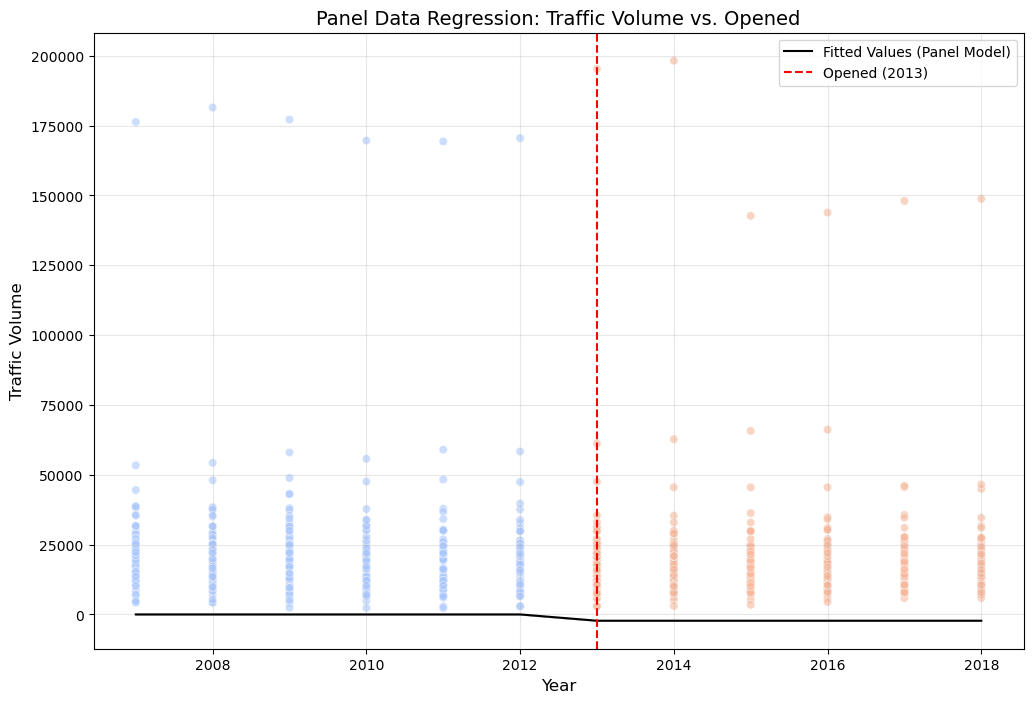

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add predictions from the model to the dataframe
long_df['fitted_values'] = fe_results.fitted_values

# Scatter plot of actual data points
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=long_df.reset_index(), 
    x='year', 
    y='traffic_volume', 
    hue='opened', 
    alpha=0.6, 
    palette='coolwarm',
    legend=None
)

# Plot the fitted regression line
sns.lineplot(
    data=long_df.reset_index(), 
    x='year', 
    y='fitted_values', 
    color='black', 
    label='Fitted Values (Panel Model)'
)

# Highlight the discontinuity
plt.axvline(x=2013, color='red', linestyle='--', label='Opened (2013)')

# Labels and title
plt.title('Panel Data Regression: Traffic Volume vs. Opened', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

In [139]:
from plotnine import *

In [140]:
long_reset = long_df.reset_index()

In [141]:
long_reset["opened"] = pd.Categorical(long_reset['opened'], categories=[0, 1])

C:\Users\helen\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_col : Removed 99 rows containing missing values.


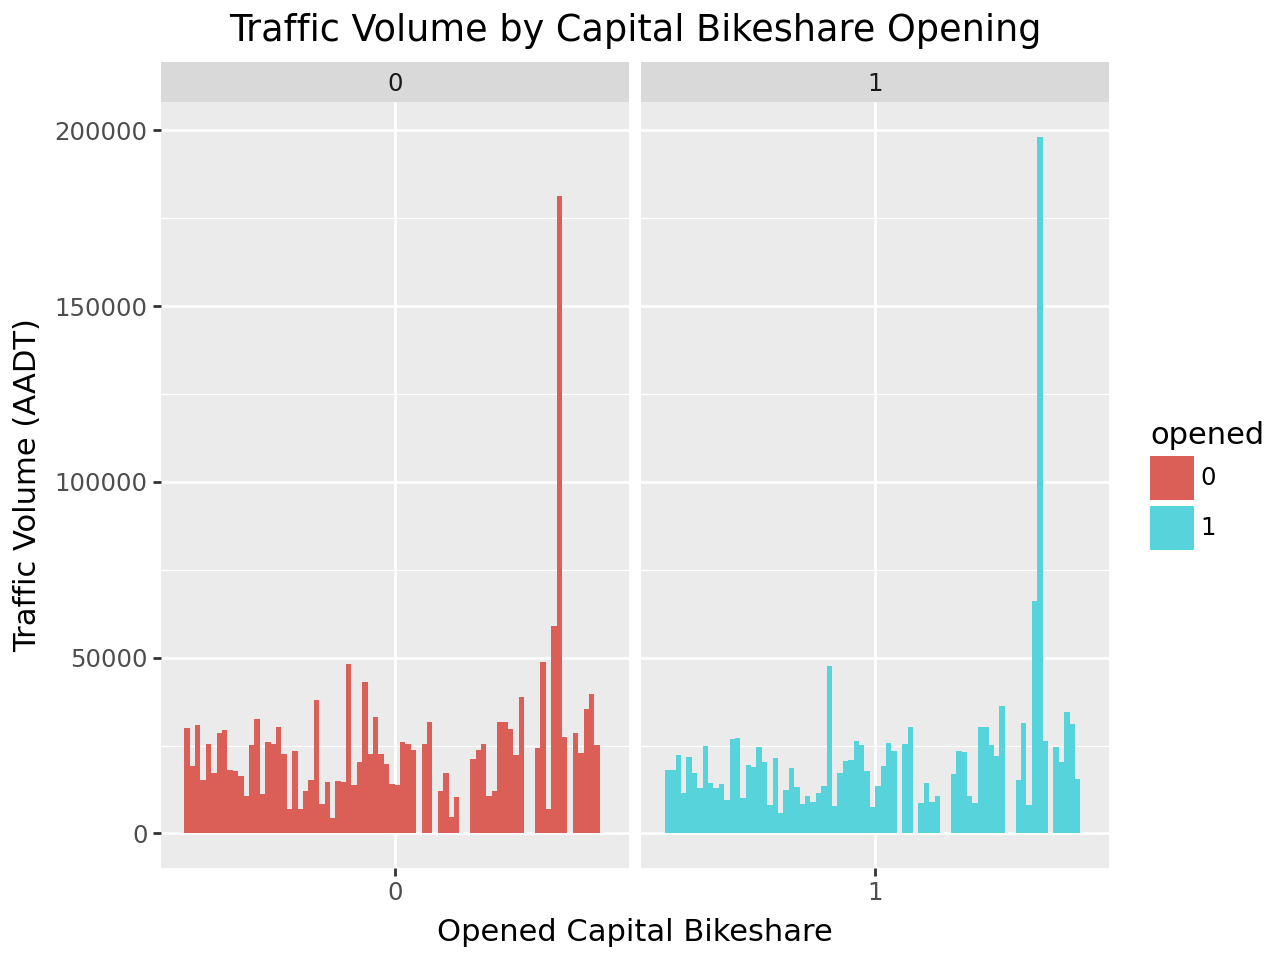

In [142]:
(
ggplot(data = long_reset) +
    geom_col(mapping = aes(x = "opened", y  = "traffic_volume", group = "id", fill = "opened"), position = position_dodge()) +
    facet_wrap('~opened', scales='free_x') +
    labs(x = "Opened Capital Bikeshare", y = "Traffic Volume (AADT)", title = "Traffic Volume by Capital Bikeshare Opening",
        fill = "opened")
)


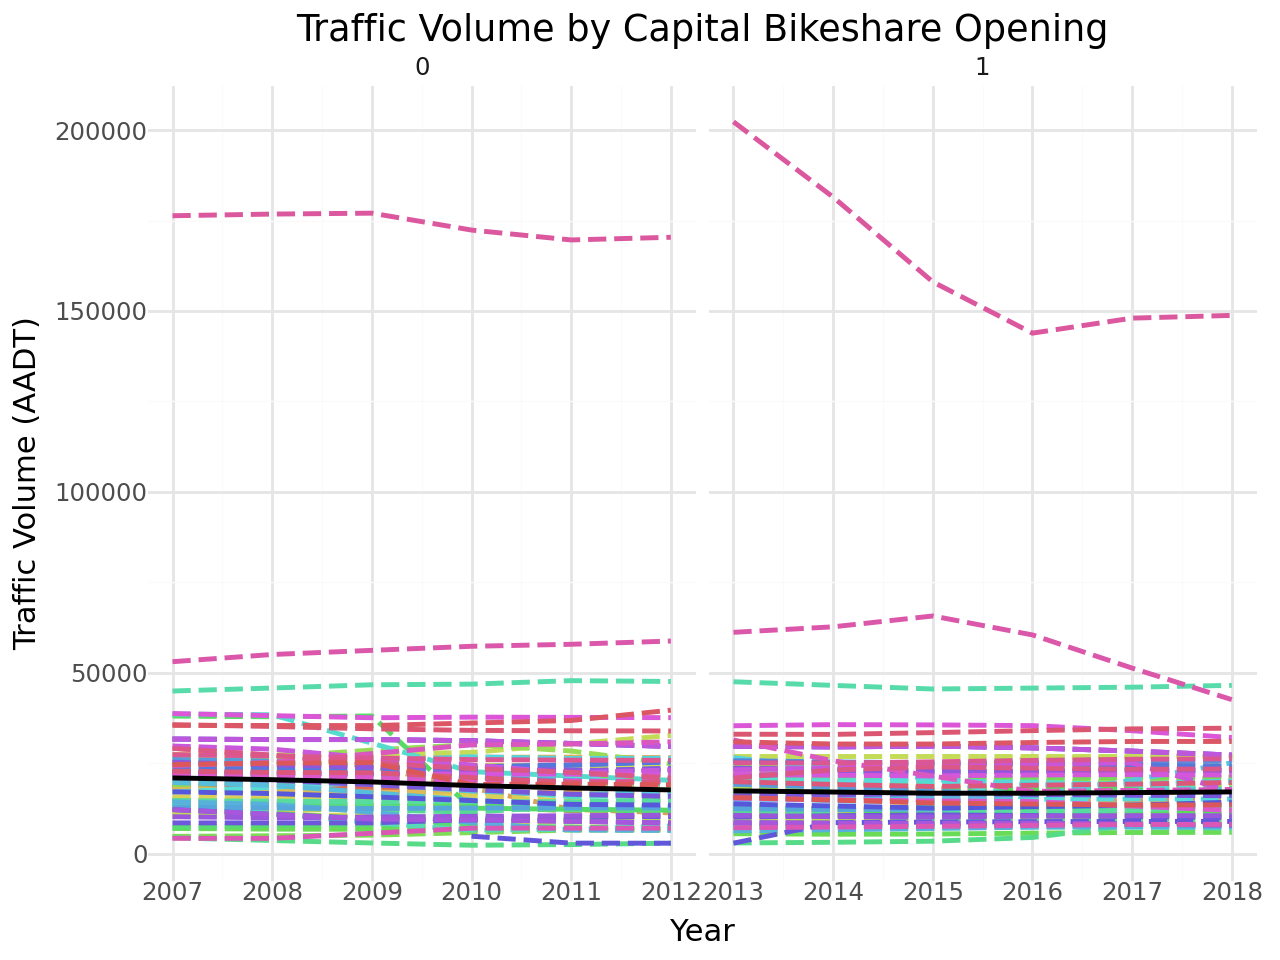

In [143]:
(
ggplot(data = long_reset) +
    geom_smooth(mapping = aes(x = "year", y = "traffic_volume", group = "id", color = "id"), se = False, linetype = "dashed") +
    geom_smooth(mapping = aes(x = "year", y = "traffic_volume", group = "opened"), color = "black", se = False) +
    facet_wrap('~opened', scales='free_x') +
    theme_minimal() +
    labs(x = "Year", y = "Traffic Volume (AADT)", title = "Traffic Volume by Capital Bikeshare Opening",
        color = "Opened Bikeshare") +
    theme(legend_position = "none")
)

In [144]:
df.columns

Index(['id', 'long', 'lat', 'open_year', 'name', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', 'opened_station', 'opened_2013', 'Percent_Change_2007',
       'Percent_Change_2008', 'Percent_Change_2009', 'Percent_Change_2010',
       'Percent_Change_2011', 'Percent_Change_2012', 'Percent_Change_2013',
       'Percent_Change_2014', 'Percent_Change_2015', 'Percent_Change_2016',
       'Percent_Change_2017', 'Percent_Change_2018', 'Percent_Change_2019'],
      dtype='object')

In [145]:
long_reset['traffic_volume_zscore'] = long_reset.groupby('id')['traffic_volume'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [146]:
#cleaning up opened for graphs
long_reset["opened_dich"] = np.where(long_reset["opened"] == 1, "Opened", "Unopened")
long_reset["opened_dich"] = pd.Categorical(long_reset["opened_dich"], categories=['Unopened', 'Opened'], ordered=True)


In [147]:
long_reset["year"]

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
931    2018
932    2018
933    2018
934    2018
935    2018
Name: year, Length: 936, dtype: int32

C:\Users\helen\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 99 rows containing missing values.


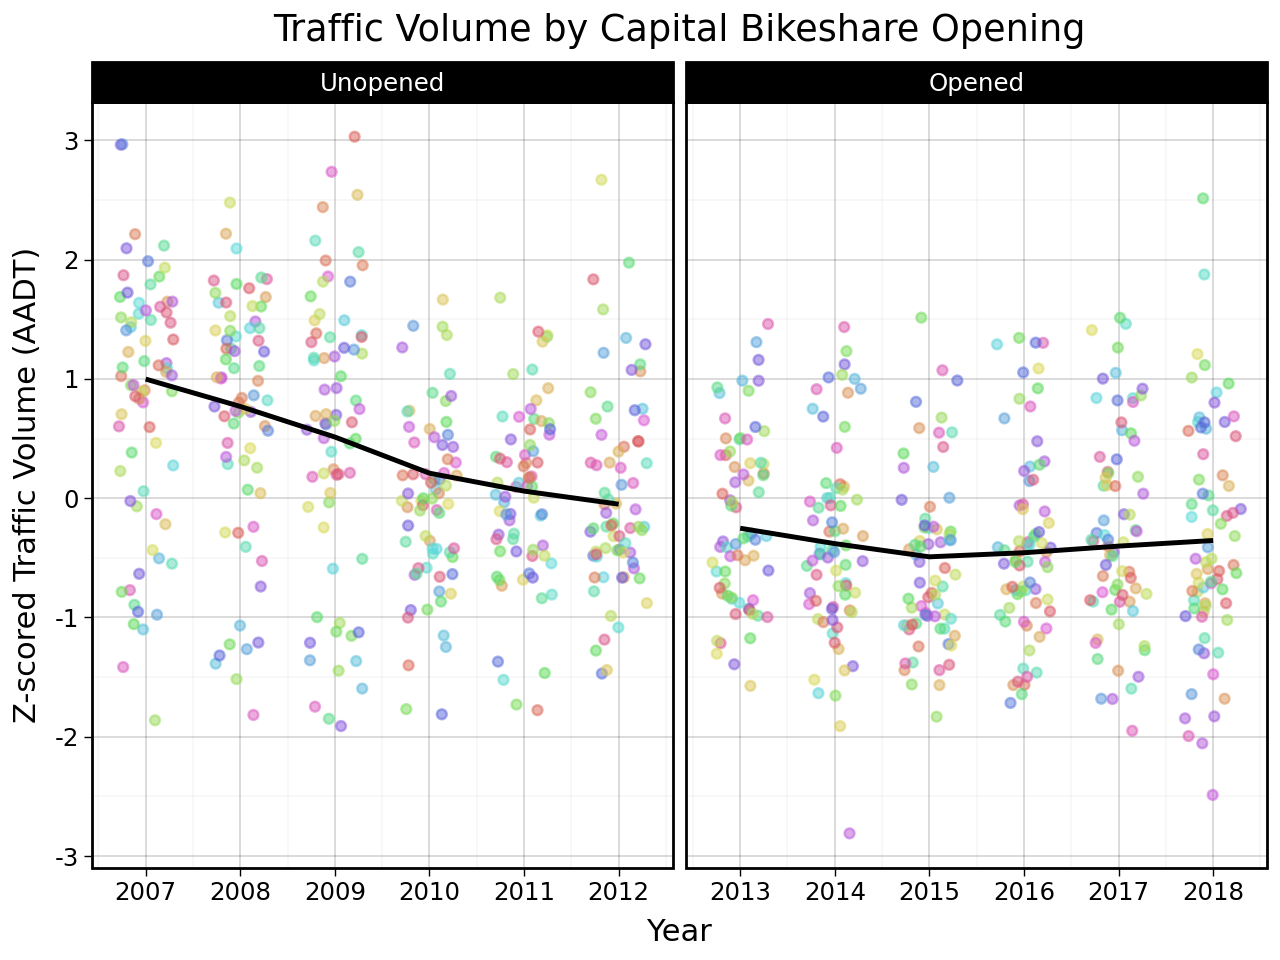

In [150]:
(
ggplot(data = long_reset) +
    geom_jitter(mapping = aes(x = "year", y = "traffic_volume_zscore", color = "id"), 
                alpha = 0.5, width=0.3, height=0.3) +
    geom_smooth(mapping = aes(x = "year", y = "traffic_volume_zscore", group = "opened_dich"), color = "black", se = False) +
    labs(x = "Year", y = "Z-scored Traffic Volume (AADT)", title = "Traffic Volume by Capital Bikeshare Opening",
        color = "Opened Bikeshare") +
    theme_linedraw() +
    theme(legend_position = "none") +
    scale_x_continuous(breaks= range(2007, 2019)) +
    facet_wrap('~opened_dich', scales='free_x') 
)

C:\Users\helen\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


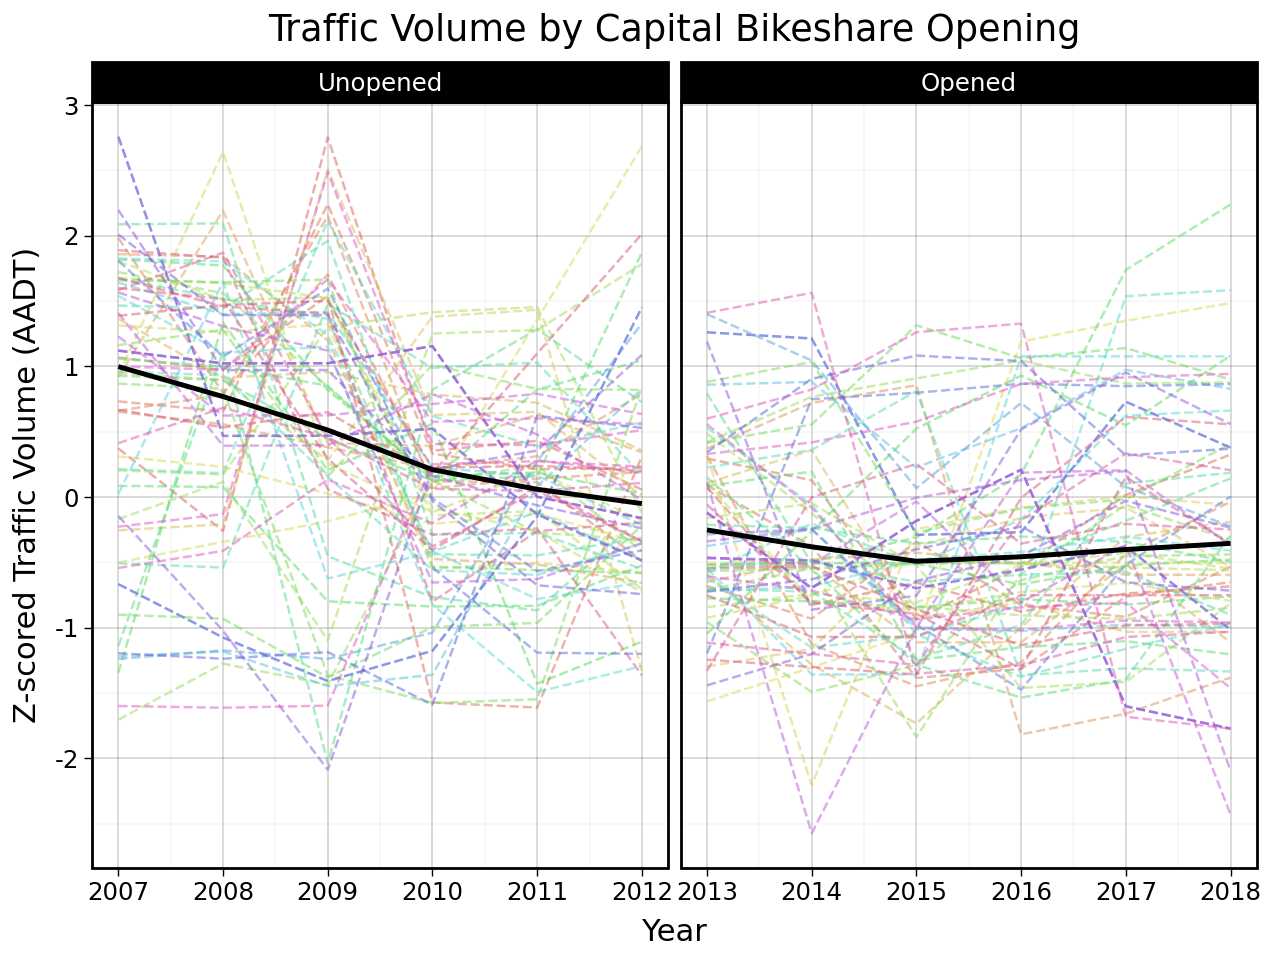

In [151]:
(
ggplot(data = long_reset) +
    geom_line(mapping = aes(x = "year", y = "traffic_volume_zscore", group = "id", color = "id"), 
                linetype = "dashed", alpha = 0.5) +
    geom_smooth(mapping = aes(x = "year", y = "traffic_volume_zscore", group = "opened_dich"), color = "black", se = False) +
    facet_wrap('~opened_dich', scales='free_x') +
    labs(x = "Year", y = "Z-scored Traffic Volume (AADT)", title = "Traffic Volume by Capital Bikeshare Opening",
        color = "Opened Bikeshare") +
    theme_linedraw() +
    theme(legend_position = "none") +
    scale_x_continuous(breaks= range(2007, 2019))
)